<a href="https://colab.research.google.com/github/anil-mannem/INFO-5731-Spring-2024/blob/main/Mannem_Anil_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [74]:
# Write your code here
import pandas as pd
df=pd.read_csv('/content/Sentiment_reviews (2).csv')
df.head()




,Unnamed: 0,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction,Sentiment_score,Sentiment_
0,0,5.0 out of 5 stars\niphone 11 is pretty great!,I know from experience what the phones are lik...,know experi phone like amazon son purchas phon...,know experience phone like amazon son purchase...,0.996015,NEGATIVE
1,1,5.0 out of 5 stars\nNo complaints!,I had to upgrade from my iPhone 8 to use my iw...,upgrad phone 8 use watch need work cheap great...,upgrade phone 8 use watch need work cheap grea...,0.982137,NEGATIVE
2,2,5.0 out of 5 stars\nApple iPhone 11 Review: A ...,Update: I'm back with an update on our journe...,updat back updat journey phone 11 let tell qui...,update back update journey phone 11 let tell q...,0.998391,NEGATIVE
3,3,4.0 out of 5 stars\nAn actual honest review,"Okay, so you probably see a lot of stuff about...",okay probabl see lot stuff phone good bad 50 5...,okay probably see lot stuff phone good bad 50 ...,0.997207,NEGATIVE
4,4,5.0 out of 5 stars\nExcellent Value and Perfor...,"⭐⭐⭐⭐⭐I recently purchased the Apple iPhone 11,...",recent purchas appl phone 11 u version 128gb b...,recently purchased apple phone 11 us version 1...,0.880473,NEGATIVE


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 990 non-null    int64  
 1   Review Title               990 non-null    object 
 2   Review Text                990 non-null    object 
 3   Preprocessed_Review_Text   990 non-null    object 
 4   After Spelling Correction  990 non-null    object 
 5   Sentiment_score            990 non-null    float64
 6   Sentiment_                 990 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.3+ KB


In [76]:
import nltk   #Cleaning
df['Review Text'] = df['Review Text'].str.replace('[^\w\s]','')  #Removal of punctuation
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))#Lower case
from nltk.corpus import stopwords #Removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
words = []   # Building the document-term matrix

# Import necessary libraries
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import pandas as pd

# Create a tokenizer that splits the text into words using a regular expression
tokenizer = RegexpTokenizer(r'\w+')

# Iterate through each review in the 'Review' column of the DataFrame
for x in pd.Series(df['Review Text']):
    # Tokenize the text using the defined tokenizer
    a = tokenizer.tokenize(x)

    # Append the list of tokenized words to the 'words' list
    words.append(a)

# Create a Gensim dictionary to map words to unique integer IDs
dictionary = corpora.Dictionary(words)

# Create a document-term matrix (bag-of-words representation) for each document
corpus = [dictionary.doc2bow(word) for word in words]



In [78]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)


In [79]:
print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.061*"phone" + 0.027*"great" + 0.020*"t" + 0.020*"i" + 0.020*"use"'), (1, '0.042*"phone" + 0.028*"lot" + 0.028*"50" + 0.028*"10" + 0.028*"problem"'), (2, '0.031*"iphone" + 0.031*"11" + 0.031*"apple" + 0.031*"packaging" + 0.021*"phone"'), (3, '0.030*"phone" + 0.030*"minor" + 0.030*"100" + 0.030*"got" + 0.030*"activated"'), (4, '0.004*"phone" + 0.003*"like" + 0.002*"good" + 0.002*"t" + 0.002*"11"'), (5, '0.003*"iphone" + 0.003*"11" + 0.002*"phone" + 0.002*"apple" + 0.002*"s"'), (6, '0.034*"iphone" + 0.034*"11" + 0.020*"apple" + 0.014*"s" + 0.010*"design"'), (7, '0.042*"phone" + 0.036*"like" + 0.036*"t" + 0.021*"apple" + 0.021*"one"'), (8, '0.028*"iphone" + 0.022*"11" + 0.014*"device" + 0.014*"phone" + 0.014*"face"'), (9, '0.003*"11" + 0.003*"iphone" + 0.002*"phone" + 0.002*"apple" + 0.002*"s"')]


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [104]:
# Write your code here
df['Sentiment_'].value_counts()

Sentiment_
NEGATIVE    990
Name: count, dtype: int64

In [105]:
df.head()


,Unnamed: 0,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction,Sentiment_score,Sentiment_
0,0,5.0 out of 5 stars\niphone 11 is pretty great!,know experience phones like amazon. son purcha...,know experi phone like amazon son purchas phon...,know experience phone like amazon son purchase...,0.996015,NEGATIVE
1,1,5.0 out of 5 stars\nNo complaints!,"upgrade iphone 8 use iwatch need work, cheap g...",upgrad phone 8 use watch need work cheap great...,upgrade phone 8 use watch need work cheap grea...,0.982137,NEGATIVE
2,2,5.0 out of 5 stars\nApple iPhone 11 Review: A ...,"update: i'm back update journey iphone 11, let...",updat back updat journey phone 11 let tell qui...,update back update journey phone 11 let tell q...,0.998391,NEGATIVE
3,3,4.0 out of 5 stars\nAn actual honest review,"okay, probably see lot stuff phone good bad. 5...",okay probabl see lot stuff phone good bad 50 5...,okay probably see lot stuff phone good bad 50 ...,0.997207,NEGATIVE
4,4,5.0 out of 5 stars\nExcellent Value and Perfor...,"⭐⭐⭐⭐⭐i recently purchased apple iphone 11, us ...",recent purchas appl phone 11 u version 128gb b...,recently purchased apple phone 11 us version 1...,0.880473,NEGATIVE


In [106]:
df['Sentiment_'].value_counts()

Sentiment_
NEGATIVE    990
Name: count, dtype: int64

In [107]:
import nltk
df['Review Text'] = df['Review Text'].str.replace('[^\w\s]','')  #Removal of punctuation
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))#Lower case
from nltk.corpus import stopwords #Removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
df.head()

,Unnamed: 0,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction,Sentiment_score,Sentiment_
0,0,5.0 out of 5 stars\niphone 11 is pretty great!,know experience phones like amazon. son purcha...,know experi phone like amazon son purchas phon...,know experience phone like amazon son purchase...,0.996015,NEGATIVE
1,1,5.0 out of 5 stars\nNo complaints!,"upgrade iphone 8 use iwatch need work, cheap g...",upgrad phone 8 use watch need work cheap great...,upgrade phone 8 use watch need work cheap grea...,0.982137,NEGATIVE
2,2,5.0 out of 5 stars\nApple iPhone 11 Review: A ...,"update: i'm back update journey iphone 11, let...",updat back updat journey phone 11 let tell qui...,update back update journey phone 11 let tell q...,0.998391,NEGATIVE
3,3,4.0 out of 5 stars\nAn actual honest review,"okay, probably see lot stuff phone good bad. 5...",okay probabl see lot stuff phone good bad 50 5...,okay probably see lot stuff phone good bad 50 ...,0.997207,NEGATIVE
4,4,5.0 out of 5 stars\nExcellent Value and Perfor...,"⭐⭐⭐⭐⭐i recently purchased apple iphone 11, us ...",recent purchas appl phone 11 u version 128gb b...,recently purchased apple phone 11 us version 1...,0.880473,NEGATIVE


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 990 non-null    int64  
 1   Review Title               990 non-null    object 
 2   Review Text                990 non-null    object 
 3   Preprocessed_Review_Text   990 non-null    object 
 4   After Spelling Correction  990 non-null    object 
 5   Sentiment_score            990 non-null    float64
 6   Sentiment_                 990 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.3+ KB


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(df['Review Text'])
x_values =  tf_idf.transform(df['Review Text'])
y_values = df['Sentiment_']


# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [111]:
from sklearn import metrics

def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy.round(4))
    print("Recall:", Recall.round(4))
    print("Precision:", Precision.round(4))
    print("F-1 score:", F1.round(4))

In [112]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

naive_bayes_implement = naive_bayes.MultinomialNB()

naive_bayes_implement.fit(x_train, y_train)

y_pred_valid = naive_bayes_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)

print("Cross Validation Score:", cross_val_score(naive_bayes_implement, x_valid, y_valid, cv=KFold(2, shuffle=True, random_state=22)))

Accuracy:  1.0
Recall: 1.0
Precision: 1.0
F-1 score: 1.0
Cross Validation Score: [1. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [113]:
from sklearn import svm

svm_implement = svm.SVC()

svm_implement.fit(x_train,y_train)

y_pred_valid = svm_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(svm_implement, x_valid, y_valid, cv= KFold(3, shuffle=True, random_state = 22)).mean().round(4))


ValueError: The number of classes has to be greater than one; got 1 class

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [32]:
# Write your code here
df_test = pd.read_csv("/content/test.csv")
df_train = pd.read_csv("/content/train.csv")


In [33]:
print(df_test.shape)
print(df_train.shape)

(1459, 80)
(1460, 81)


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [36]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()

x_training_data = df_train.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(df_train.SalePrice)


x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 40, test_size=0.3)


regression = LinearRegression()
regression.fit(x_train,y_train)

y_pred = regression.predict(x_test)

In [38]:
print('Linear Regression R squared": %.4f' % regression.score(x_test, y_test))

Linear Regression R squared": 0.8804


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin = mean_squared_error(np.exp(y_pred), y_test)
lin_r = np.sqrt(lin)
print(lin_r)

188802.18310280904


In [40]:
results = {"Predicted Prices":np.exp(y_pred),"Actual Prices":np.exp(y_test)}
df_val = pd.DataFrame(results)
df_val["Percentage Difference"] = round(abs((df_val["Predicted Prices"] - df_val["Actual Prices"]) / df_val["Actual Prices"]) * 100,2)
df_val

,Predicted Prices,Actual Prices,Percentage Difference
1258,187373.644622,190000.0,1.38
1041,178976.951042,173000.0,3.45
1181,251633.343662,392500.0,35.89
1108,180193.538586,181000.0,0.45
554,266967.773811,284000.0,6.00
...,...,...,...
1288,228544.745849,278000.0,17.79
1163,120901.108846,108959.0,10.96
1339,119370.516128,128500.0,7.10
1301,151233.379404,177500.0,14.80


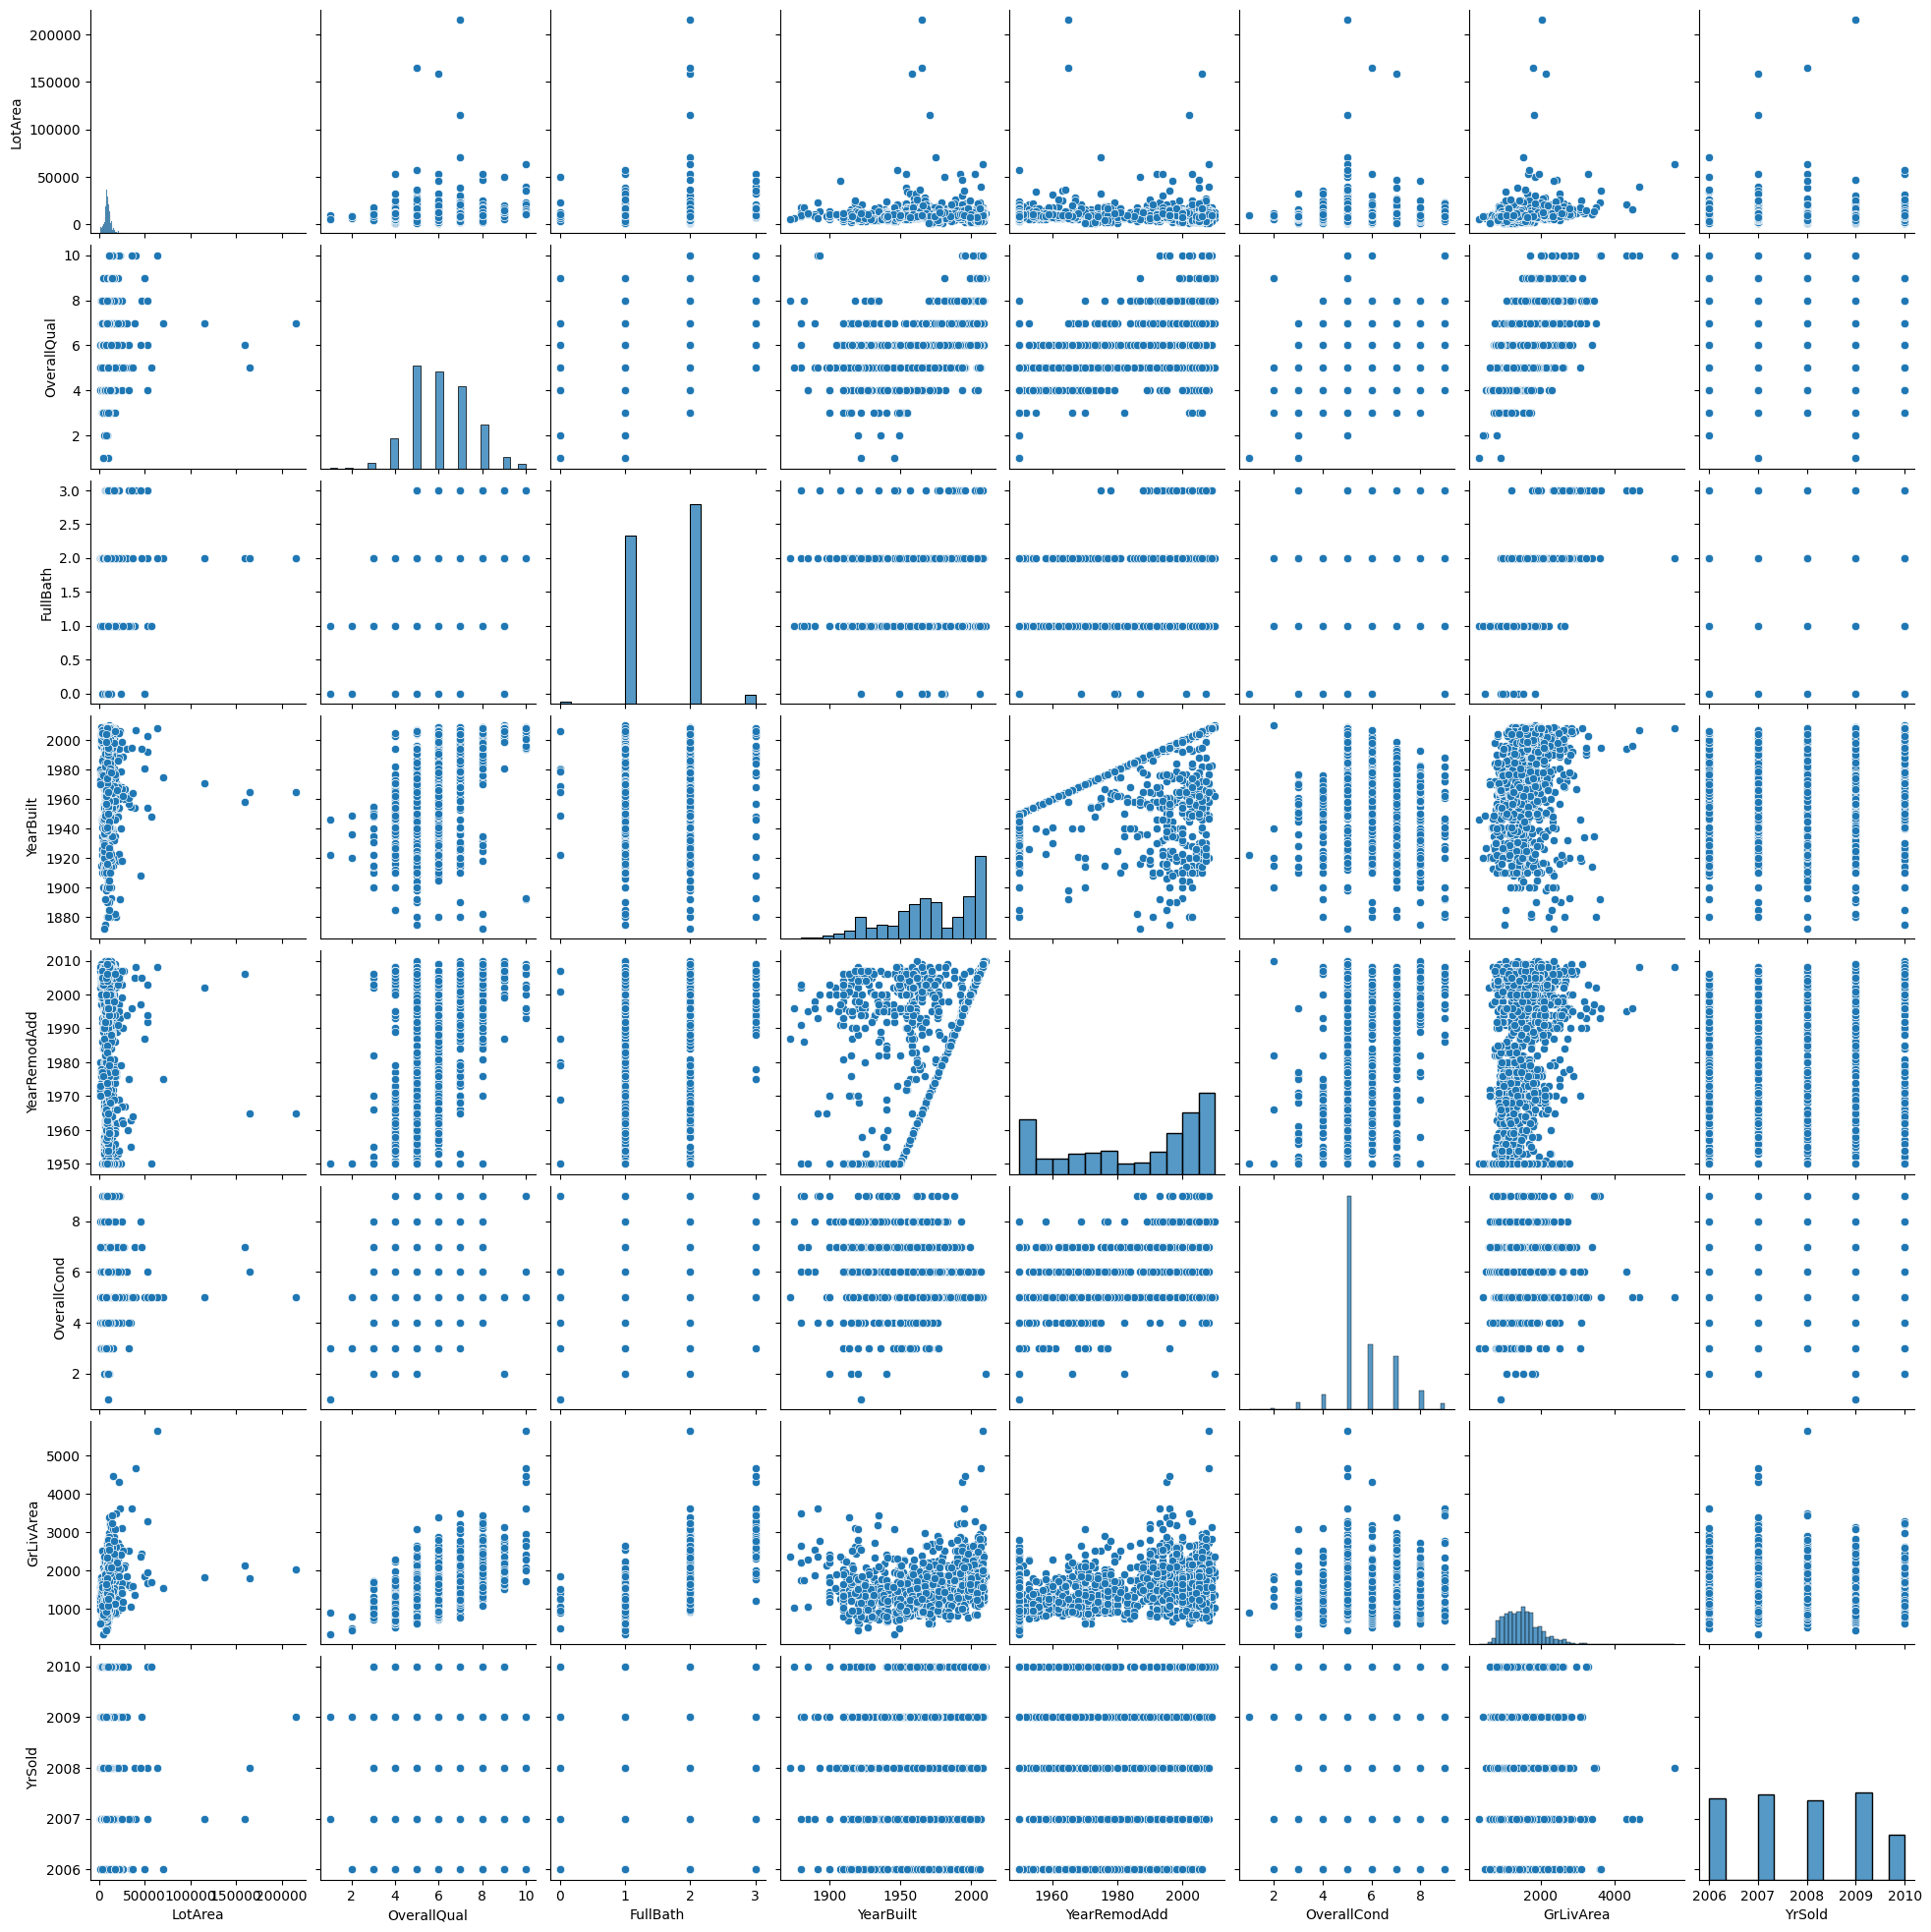

In [62]:
sns.pairplot(hp_cleaned[['LotArea', 'OverallQual', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'OverallCond', 'GrLivArea', 'YrSold']])
plt.show()

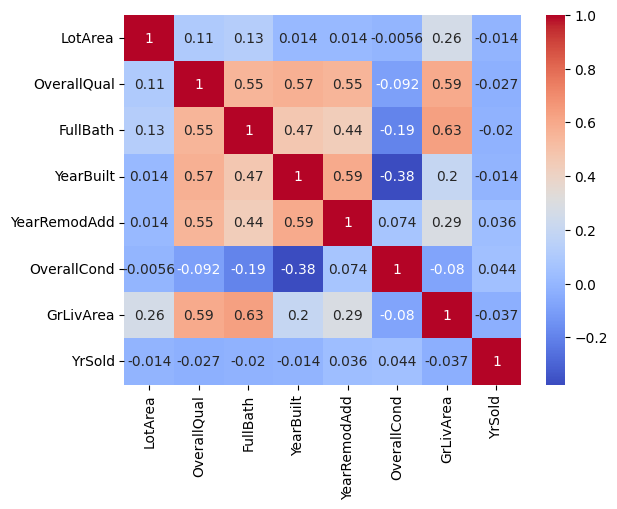

In [63]:
corr_matrix = hp_cleaned[['LotArea', 'OverallQual', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'OverallCond', 'GrLivArea', 'YrSold']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

LotArea: Represents the land area of the property, as larger lots often command greater prices due to development potential.

OverallQual: Rates the overall material and finish quality of the house, which can significantly impact its durability, energy efficiency, maintenance requirements, and resale value.

FullBath: Counts the full bathrooms located above grade (on the main or upper levels), as well as those partially or fully below grade that meet the criteria of a full bathroom.

YearBuilt: Represents the original construction date, which can be determined through official homeownership documents, local permit and property records, and consultation with real estate and construction professionals.

YearRemodAdd: Captures the year when the property was remodeled or had additions made. If no remodeling or additions have occurred, this variable will match the YearBuilt.

OverallCond: Likely rates the overall condition of the house on a scale, considering factors such as physical condition, maintenance level, and necessary repairs or renovations.

GrLivArea: Represents the total square footage of the living area above ground level, excluding basement or lower-level spaces. This is a key feature often correlated with the overall sale price.

Together, these features collectively capture essential aspects of a property, enabling accurate prediction of its sale price.
Relat

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('/content/Sentiment_reviews (1).csv')

# Assuming you have 'User Reviews' and 'sentiment' columns
X = df['Review Text'].values
y = df['Sentiment_'].apply(lambda x: 1 if x == 'positive' else 0).values  # Convert 'positive' to 1, 'negative' to 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a subset for development (20% of the training set)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 for binary classification

# Tokenize and encode the text data
X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt', max_length=256)
X_dev_tokens = tokenizer(list(X_dev), padding=True, truncation=True, return_tensors='pt', max_length=256)
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt', max_length=256)

# Create DataLoader for training, development, and testing sets
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], torch.tensor(y_train, dtype=torch.long))
dev_dataset = TensorDataset(X_dev_tokens['input_ids'], X_dev_tokens['attention_mask'], torch.tensor(y_dev, dtype=torch.long))
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], torch.tensor(y_test, dtype=torch.long))

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=8, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Fine-tune the BERT model on your task (training loop)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the model on the development set
model.eval()
dev_predictions = []
with torch.no_grad():
    for batch in dev_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        dev_predictions.extend(predicted_labels.cpu().numpy())

# Calculate key metrics on the development set
dev_accuracy = accuracy_score(y_dev, dev_predictions)
dev_precision = precision_score(y_dev, dev_predictions)
dev_recall = recall_score(y_dev, dev_predictions)
dev_f1 = f1_score(y_dev, dev_predictions)

print(f'Development Set Accuracy: {dev_accuracy:.4f}')
print(f'Development Set Precision: {dev_precision:.4f}')
print(f'Development Set Recall: {dev_recall:.4f}')
print(f'Development Set F1 Score: {dev_f1:.4f}')

# Evaluate the model on the test set
test_predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        test_predictions.extend(predicted_labels.cpu().numpy())

# Calculate key metrics on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print(f'Test Set Accuracy: {test_accuracy:.4f}')
print(f'Test Set Precision: {test_precision:.4f}')
print(f'Test Set Recall: {test_recall:.4f}')
print(f'Test Set F1 Score: {test_f1:.4f}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and b

Development Set Accuracy: 1.0000
Development Set Precision: 0.0000
Development Set Recall: 0.0000
Development Set F1 Score: 0.0000
Test Set Accuracy: 1.0000
Test Set Precision: 0.0000
Test Set Recall: 0.0000
Test Set F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


BERT

Google created BERT, a large-scale, pre-trained language model that has demonstrated outstanding performance on a range of natural language processing applications.

Among the base BERT models, the 'bert-base-uncased' model possesses the following features: sources of pre-training data: The English Wikipedia and the BookCorpus dataset, which both provide a substantial quantity of text data, were used to pre-train the model.
The quantity of parameters About 110 million parameters make up the 'bert-base-uncased' model.
By categorizing user reviews as "positive" or "negative," the sentiment analysis job helps the BERT model to be optimized.

Using the sentiment analysis dataset, the algorithm fine-tunes the BERT model according to a given job.
Using the Cross-Entropy loss function and the AdamW optimizer, the model is optimized for a single epoch.
The model's performance is assessed on the development and test sets, and it is fine-tuned on the training set.